In [43]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression


from sklearn import set_config
set_config(display='diagram')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score



# Machine Learning vs General Programming

* In <span style="color: blue">**general programming**</span>, the output is the result of applying a set of rules (the "program") to input data. 

* In <span style="color: teal">**machine learning**</span> the rules are not pre-defined: instead, the input (**features**) and expected outputs (**labels**) are given and the computer learns the rules from the underlying statistics of the data.

## Types of Machine Learning Approaches
<img src="img/types_of_ML.jpg">
<a href="https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9">Kong et al (2020)</a>

## Math and Statistics vs Machine Learning
<img src="img/2.png">


## Model vs Data-Centric AI

<img src="img/3.png">

<a href="https://landing.ai/tips-for-a-data-centric-ai-approach/">Andrew Ng, Landing AI (2021)</a>




## Machine Learning: General Workflow

<img src="img/4.png">


<a href="https://link.springer.com/book/10.1007/978-1-4842-3207-1">Sarkar et al (2018)</a>, chapter 1


## Ensuring Generalization 



<img src="img/5.png">
<a href="https://visit.figure-eight.com/rs/416-ZBE-142/images/CrowdFlower_DataScienceReport_2016.pdf">CrowdFlower Data Science Report (2016)</a>


The performance of a Machine Learning model is evaluated on its ability to **generalize** when predicting **unseen data**.

We ensure that a model that we train on data generalizes well by testing it on unseen data!

## workflow:
1- dropu duplicate

2- test train split

3- EDA

4- Missing

5- Outliers

6- Scaling

7- Feature Engineering


### Dealing with duplicates 


* Unwanted duplicated observations can discredit the performance evaluation of a model because the same data can leak from the training set to the test set.

🚨 **REMOVING DUPLICATES IS THE ONLY OPERATION THAT NEEDS TO BE DONE BEFORE SPLITTING THE DATASET** 

In [45]:
import pandas as pd

In [46]:
df = pd.read_csv('input/MW.csv')
df.head()


,Id,location,date,month,day,Mw,L [km],W [km],fm,*,source,Unnamed: 11
0,1,S. California,1857,1,9,7.86,380.0,12.0,ss,NaN,S,NaN
1,2,San Francisco,1906,4,18,7.70,450.0,10.0,ss,NaN,S,NaN
2,3,Avezzano,1915,1,13,6.62,24.0,15.0,n,NaN,W&C,NaN
3,4,Kanto,1923,9,1,8.10,130.0,70.0,r,x,G,NaN
4,4,Kanto,1923,9,1,7.89,130.0,70.0,r,x,M&B,NaN


In [48]:
df.columns

Index(['Id', 'location', 'date', 'month', 'day', 'Mw', 'L [km]', 'W [km]',
       'fm', '*', 'source', 'Unnamed: 11'],
      dtype='object')

### 💻 <code>drop_duplicates</code>


In [49]:
# Check number of duplicates
df.duplicated().sum()

0

In [50]:
# Remove duplicates
df = df.drop_duplicates() 

### Splitting data with the Holdout Method
The Holdout Method is used to evaluate a model's ability to generalize. It consists of splitting the dataset into two sets:

* **Training set** (~70%) 
* **Testing set** (~30%) 


### 💻 <code>train_test_split</code>

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
df

,Id,location,date,month,day,Mw,L [km],W [km],fm,*,source,Unnamed: 11
0,1,S. California,1857,1,9,7.86,380.0,12.0,ss,NaN,S,NaN
1,2,San Francisco,1906,4,18,7.70,450.0,10.0,ss,NaN,S,NaN
2,3,Avezzano,1915,1,13,6.62,24.0,15.0,n,NaN,W&C,NaN
3,4,Kanto,1923,9,1,8.10,130.0,70.0,r,x,G,NaN
4,4,Kanto,1923,9,1,7.89,130.0,70.0,r,x,M&B,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
354,280,Kuriles,2007,1,13,8.10,210.0,NaN,n,x,23,NaN
355,281,Niigata-Ken,2007,7,16,6.80,30.0,24.0,r,NaN,24,NaN
356,282,New Zealand,2007,10,15,6.70,24.0,15.0,r,x,25,NaN
357,283,Wenchuan,2008,5,12,7.90,270.0,NaN,r,NaN,26,NaN


In [56]:
y = df['Mw']
X = df.drop(columns=['Mw'])
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,random_state=42 )

### 💻 <code>EDA</code>

1. type

In [59]:
y_train.nunique()

177

In [60]:
X_train.dtypes

Id               int64
location        object
date            object
month            int64
day              int64
L [km]         float64
W [km]         float64
fm              object
*               object
source          object
Unnamed: 11     object
dtype: object

In [65]:
num_data = X_train.select_dtypes(include=['int64','float64']).columns

cat_data = X_train.select_dtypes(include=['object']).columns

In [66]:
cat_data

Index(['location', 'date', 'fm', '*', 'source', 'Unnamed: 11'], dtype='object')

In [67]:
num_data

Index(['Id', 'month', 'day', 'L [km]', 'W [km]'], dtype='object')

In [68]:
cat_data = cat_data.drop(['date'])

In [69]:
num_data = num_data.drop(['Id', 'month','day'])

In [71]:
num_data

Index(['L [km]', 'W [km]'], dtype='object')

2. missing

In [72]:
X_train[cat_data].isna().sum()

location         0
fm               0
*              238
source           3
Unnamed: 11    284
dtype: int64

In [73]:
X_train[num_data].isna().sum()

L [km]     0
W [km]    25
dtype: int64

In [74]:
cat_data = cat_data.drop(['*', 'Unnamed: 11'])

5. co linearity 

In [76]:
corr

,L [km],W [km]
L [km],1.000000,0.725814
W [km],0.725814,1.000000


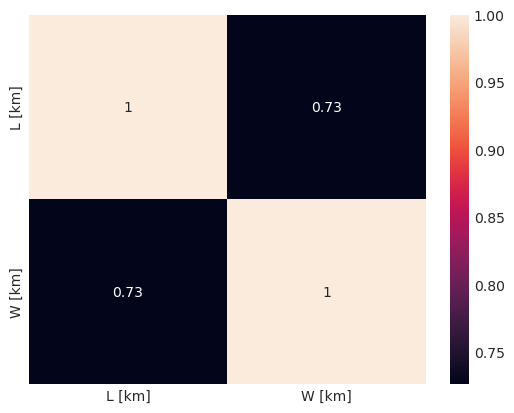

In [77]:
corr = X_train[num_data].corr()
sns.heatmap(corr, annot=corr);

In [78]:
num_data = num_data.drop(['W [km]'])

3. distribution 

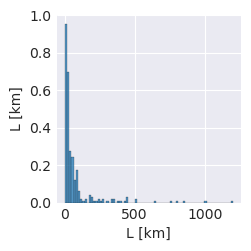

In [79]:
import seaborn as sns
sns.pairplot(X_train[num_data]);

4. outlier and 5. scaling

In [81]:
X_train[num_data].describe()

,L [km]
count,287.000000
mean,76.881742
std,150.006778
min,1.500000
25%,13.000000
50%,30.000000
75%,64.500000
max,1200.000000


## Feature Scaling

Why do we need to scale our data?

* Features with large magnitudes can incorrectly outweigh features of small magnitudes 

* Scaling to smaller magnitudes improves computational efficiency 

* Increases interpretability of coefficients in parametric models

* Essential for 'distance-based' models

## Three common scaling algorithms
* 👉 **Standardizing**: Sklearn <code>StandardScaler()</code>
$$z =  \frac{(x - mean)}{std}$$

* 👉 **Robust Scaling**: Sklearn <code>RobustScaler()</code>
$$Robust Scaled = \frac{(x - median)}{IQR}$$

* 👉 **Normalizing**: Sklearn <code>MinMaxScaler()</code>
$$X' =  \frac{(X - X_{min})}{X_{max} - X_{min}}$$

### Standardization:
* Most effective when data is normally distributed 
* Does not ensure an exact common range 
* Sensitive to outliers 
* Can distort relative distances between feature values 

### Robust Scaling:
* Similar to standardization but more robust to outliers

### Normalizing:
* Ensures a fixed range, important with distance based algorithms like the K-Nearest Neighbours
* Efficient regardless of distribution 
* Doesn't reduce the effect of outliers 
* Doesn't correct the skewness of a distribution 


In [87]:
X_train['source'].value_counts()

W&C     159
K        32
G        28
M&B      24
S        20
4         3
12        1
27        1
25        1
14        1
22        1
19        1
6         1
2         1
26        1
21        1
W&C       1
15        1
10        1
9         1
13        1
8         1
23        1
18        1
Name: source, dtype: int64

In [88]:
num_pipe = make_pipeline(SimpleImputer(), StandardScaler())
cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

In [89]:
final_pipe = ColumnTransformer([
    ('num', num_pipe, num_data),
    ('cat', cat_pipe, cat_data)])

In [90]:
final_pipe

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['L [km]'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['location', 'fm', 'source'], dtype='object'))])

# Model:

### Linear Regression: 
A fundamental model where the relationship between a dependent variable and one or more independent variables is linear. It's often used for forecasting and finding out the strength of predictors.


### Polynomial Regression:
An extension of linear regression where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial. Useful for non-linear data.

### Ridge Regression: 
Addresses some of the problems of Linear Regression, particularly useful to analyze multiple regression data that suffer from multicollinearity (independent variables are highly correlated).

### Lasso Regression: 
Similar to Ridge, Lasso (Least Absolute Shrinkage and Selection Operator) regression also penalizes the absolute size of regression coefficients, but can zero out some coefficients, effectively performing feature selection.

### Elastic Net Regression:
A combination of Ridge and Lasso, this model is used when there are multiple correlated features. It integrates the properties of both ridge and lasso regression.

### Quantile Regression: 
Used for estimating the conditional median or other quantiles of a response variable. Especially useful in scenarios where the conditions of linear regression are not met.

### Support Vector Regression (SVR): 
Adapts the Support Vector Machine (SVM) algorithm for regression. It finds a hyperplane that best fits the data, focusing on the most extreme values (support vectors).



# Algorithm of the Day: Linear Regression
<br>

<center><img src="https://drive.google.com/uc?id=10vIFVrCUobl-gkjZSC6mKwk0qgV0KvUW" style="width:900px;"><br>
 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a>
<br>Prompt: Algorithm of the Day.</center>


<img align="center" src="https://drive.google.com/uc?id=11D1Ymcl9S2WFMMhvm3QqitxxigpKjNV4" width="1500"/>

# Ordinary Least Square (OLS) regression [a reminder]
For ordinary least square, we can define our prediction as:

$\hat{y} = (\beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n - \beta_0)$ <br><br>

where $\beta_i$ is a linear coefficient to the function and $\beta_0$ is the intercept.

We can rewrite this more simply using matrix notation:

$\hat{y} = \beta X$ <br><br>
Where $X$ is the feature matrix (multivariate regression) and $\beta$ is the matrix of coefficients. Note that a constant (<code>1</code>) is added to the feature matrix ($X_{0}$) to account for the intercept ($\beta_{0}$).

The goal is to find the $\beta$ that minimizes the **residual sum of square** between our label ($y$) and $\hat{y}$:<br><br>
$$\underset{\beta}{\mathrm{argmin}} \sum_{i=1}^{n} \left(y_{i} - \hat{y}_{i} \right)^2$$ <br><br>



## Parametric models


We have seen that some models can be summarized by a set of parameters:


***Ordinary Least Square (OLS) regression*** <br><br>

$\hat{y} = \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n - \beta_0$ <br><br>

* If the parameters $\beta$ of the functions are learned, these can be used to predict unknown samples

* There are also non-parametric algorithm!

# Sklearn modules and classes
* <code>linear_model</code> is a module
* <code>LinearRegression</code> is a class<br>
👉 <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model">Sklearn <code>linear_model</code> documentation</a>

In [91]:
final_pipe2 = make_pipeline(final_pipe, LinearRegression())

In [92]:
final_pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['L [km]'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['location', 'fm', 'source'], dtype='object'))])),
                ('linearregression', LinearRegression())])

In [36]:
final_pipe2.score(X_test,y_test)

0.048754036147923174

Edit

In [93]:
final_pipe3 = ColumnTransformer([
    ('num', num_pipe, num_data)])

In [94]:
final_pipe4 = make_pipeline(final_pipe3, LinearRegression())

In [95]:
final_pipe4.fit(X_train, y_train)
final_pipe4.score(X_test,y_test)

0.17397902982711322

# Classification

### Binary Classification
Definition: Binary classification is a type of classification task where an instance is classified into one of two classes. It's the simplest form of machine learning classification.

#### Examples:

Email Spam Detection: Classifying emails as 'Spam' or 'Not Spam'.
Medical Diagnosis: Identifying if a patient has a specific disease (Yes/No).
Encoding Needs: In binary classification, encoding is typically straightforward as it involves two classes. These are often encoded as 0 and 1. This is necessary to facilitate the mathematical computations underlying most algorithms, which require numerical input.

### Multiclass Classification
Definition: Multiclass or multinomial classification distinguishes between more than two classes.

#### Examples:

Handwritten Digit Recognition: Classifying a digit image into one of 10 classes (0-9).
Text Classification: Categorizing news articles into various topics like sports, politics, technology, etc.
Encoding Needs:

### Label Encoding: 
Each class is assigned a unique integer. This method is simple but can imply an ordinal relationship where none exists.

### One-Hot Encoding:

Each class is represented as a binary vector with all zero values except the index of the class, which is marked with 1. This is widely used as it avoids the issue of introducing artificial ordinality.

### Why Encoding is Needed:

Computational Efficiency: Most machine learning algorithms work on numerical data. Encoding categorical data into numerical values is essential for the algorithm to perform computations.

Algorithm Compatibility: Some algorithms, especially those that involve distance calculations like KNN or SVM, require numerical input to make sense of the data.

Improved Performance: Proper encoding can improve model performance by providing clearer and more meaningful representation of categories.

Avoiding Misinterpretation: Without proper encoding, models might misinterpret categorical data (like treating categories with higher numerical labels as having higher importance).

In summary, encoding is a critical step in preparing data for both binary and multiclass classification as it converts categorical labels into a format that can be easily interpreted and processed by machine learning algorithms.







# Model:
### Logistic Regression: 

Despite being named 'regression', it is actually a classification method. It's used for binary classification problems (yes/no, 0/1).

### K-Nearest Neighbors (KNN): 

A simple, instance-based learning algorithm. Classifies a data point based on how its neighbors are classified. It's effective for a dataset with a small number of dimensions.

### Support Vector Machines (SVM): 

Effective in high-dimensional spaces. It's used for both classification and regression tasks. SVM finds a hyperplane that best separates different classes by maximizing the margin between them.

### Decision Trees:

A tree-like model of decisions. They are interpretable and easy to visualize, used for both classification and regression tasks.

### Random Forest:  

An ensemble of decision trees, typically used for classification. It combines the simplicity of decision trees with flexibility, resulting in higher accuracy.

### Naive Bayes:

Based on Bayes' theorem, it assumes independence between predictors. It's simple and effective, particularly for large datasets and text classification.

### Gradient Boosting Machines (GBM):

An ensemble technique that builds trees in a sequential manner, where each tree tries to correct the mistakes of the previous one. It's known for high effectiveness in predictive accuracy.



In [40]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convert to binary classification
# Only classify iris-setosa (label 0) vs iris-versicolor (label 1)
X = X[y != 2]  # remove iris-virginica
y = y[y != 2]  # remove iris-virginica

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling for optimal performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression classifier
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00
